# BIG DATA ANALYTICS: TF-Keras 101
- Tensorflow 2의 Keras API를 활용하여, 모델을 생성/훈련하는 과정에 대해서 확인해보겠습니다
- sources:
    - https://www.tensorflow.org/tutorials/quickstart/beginner
    - https://www.tensorflow.org/tutorials/keras/overfit_and_underfit
---

## 1. 라이브러리 설치 및 Import

In [ ]:
import sys
!{sys.executable} -m pip uninstall -q tb-nightly tensorboard tensorflow-estimator tensorflow-gpu tf-estimator-nightly -y
# 딥러닝용 프레임워크 텐서플로우 2.0 설치
!{sys.executable} -m pip install -q tensorflow==2.0.0-rc1

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## 2. MNIST 손글씨 데이터 셋 Load

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


## 3. 모델 정의

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),#28x28 => 784
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 4. 훈련 및 검증

In [5]:
history = model.fit(x_train, y_train, epochs=20,validation_split=0.3)

Epoch 1/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5498 - accuracy: 0.8392 - val_loss: 0.1899 - val_accuracy: 0.9449
Epoch 2/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1769 - accuracy: 0.9498 - val_loss: 0.1435 - val_accuracy: 0.9589
Epoch 3/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1265 - accuracy: 0.9614 - val_loss: 0.1227 - val_accuracy: 0.9653
Epoch 4/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0987 - accuracy: 0.9692 - val_loss: 0.1082 - val_accuracy: 0.9685
Epoch 5/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0793 - accuracy: 0.9763 - val_loss: 0.1044 - val_accuracy: 0.9702
Epoch 6/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0669 - accuracy: 0.9799 - val_loss: 0.0960 - val_accuracy: 0.9735
Epoch 7/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0599 - accuracy: 0.9812 - val_loss: 0.0982 - val_accuracy:

In [6]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0951 - accuracy: 0.9780


[0.09508256614208221, 0.9779999852180481]

## Q1. 훈련을 더 많이 시키면 좋아질까?

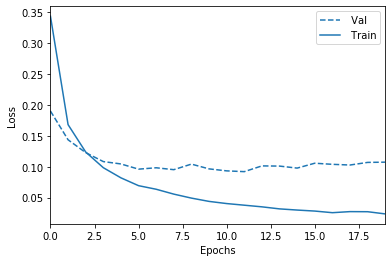

In [7]:
import matplotlib.pyplot as plt
def plot_history(histories, key='loss'):
    plt.figure()

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('', history)])

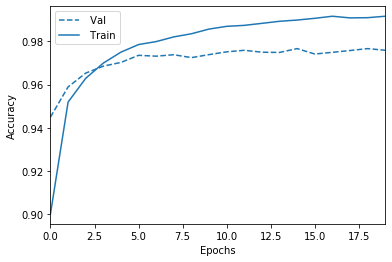

In [8]:
plot_history([('', history)],"accuracy")

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax') #만약 이진 분류라면?
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history2 = model.fit(x_train, y_train, epochs=30,validation_split=0.3)


Epoch 1/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.5658 - accuracy: 0.8348 - val_loss: 0.1847 - val_accuracy: 0.9462
Epoch 2/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1724 - accuracy: 0.9495 - val_loss: 0.1312 - val_accuracy: 0.9610
Epoch 3/30
1313/1313 [==============================] - 1s 1ms/step - loss: 0.1263 - accuracy: 0.9607 - val_loss: 0.1148 - val_accuracy: 0.9653
Epoch 4/30
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0947 - accuracy: 0.9712 - val_loss: 0.1036 - val_accuracy: 0.9692
Epoch 5/30
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0806 - accuracy: 0.9754 - val_loss: 0.0966 - val_accuracy: 0.9721
Epoch 6/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0700 - accuracy: 0.9782 - val_loss: 0.1009 - val_accuracy: 0.9715
Epoch 7/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0572 - accuracy: 0.9818 - val_loss: 0.0923 - val_accuracy:

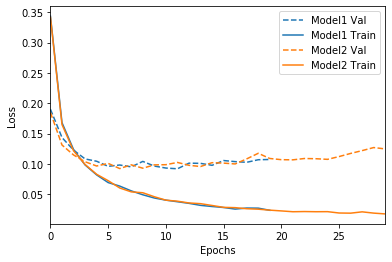

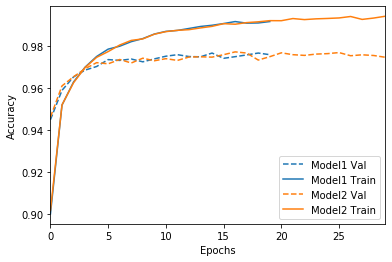

In [10]:
plot_history([('Model1', history),('Model2', history2)],"loss")
plot_history([('Model1', history),('Model2', history2)],"accuracy")

## Q2. 모델이 더 깊으면(레이어가 더 많으면) 좋을까?

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history3 = model.fit(x_train, y_train, epochs=20,validation_split=0.3)


Epoch 1/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5760 - accuracy: 0.8272 - val_loss: 0.1594 - val_accuracy: 0.9529
Epoch 2/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1591 - accuracy: 0.9529 - val_loss: 0.1175 - val_accuracy: 0.9654
Epoch 3/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1017 - accuracy: 0.9688 - val_loss: 0.1239 - val_accuracy: 0.9614
Epoch 4/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0790 - accuracy: 0.9755 - val_loss: 0.1030 - val_accuracy: 0.9705
Epoch 5/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0633 - accuracy: 0.9805 - val_loss: 0.1088 - val_accuracy: 0.9687
Epoch 6/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0485 - accuracy: 0.9851 - val_loss: 0.1070 - val_accuracy: 0.9722
Epoch 7/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.1075 - val_accuracy:

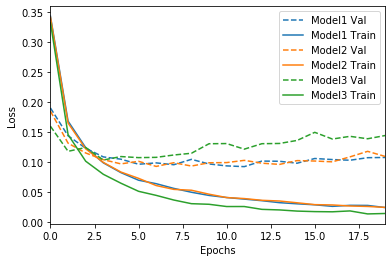

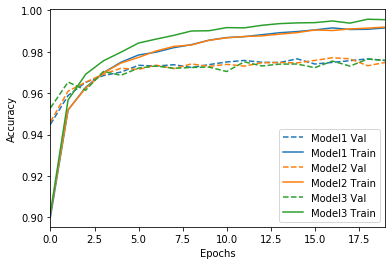

In [12]:
plot_history([('Model1', history),('Model2', history2),('Model3', history3)],"loss")
plot_history([('Model1', history),('Model2', history2),('Model3', history3)],"accuracy")